In [1]:
# Loading the data
from nltk.corpus import stopwords
import string, re
# import string and re for string and regex manipulation
# import stopwords to filter them out for memory usuage

# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all the text
    text = file.read()
    # close the file
    file.close()
    return text

# turn a doc into clean tokens
def clean_doc(doc):
    # split into tokens by white space
    tokens = doc.split()
    # prepare regex for char filtering
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    # remove punctuation from each word
    tokens = [re_punc.sub('', w) for w in tokens]
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    # filter out short tokens
    tokens = [word for word in tokens if len(word)>1]
    return tokens

# load the document
filename = 'C:\\Users\\Aaron\\Downloads\\txt_sentoken\\pos\\cv000_29590.txt'
text = load_doc(filename)
tokens = clean_doc(text)
print(tokens)

['films', 'adapted', 'comic', 'books', 'plenty', 'success', 'whether', 'theyre', 'superheroes', 'batman', 'superman', 'spawn', 'geared', 'toward', 'kids', 'casper', 'arthouse', 'crowd', 'ghost', 'world', 'theres', 'never', 'really', 'comic', 'book', 'like', 'hell', 'starters', 'created', 'alan', 'moore', 'eddie', 'campbell', 'brought', 'medium', 'whole', 'new', 'level', 'mid', 'series', 'called', 'watchmen', 'say', 'moore', 'campbell', 'thoroughly', 'researched', 'subject', 'jack', 'ripper', 'would', 'like', 'saying', 'michael', 'jackson', 'starting', 'look', 'little', 'odd', 'book', 'graphic', 'novel', 'pages', 'long', 'includes', 'nearly', 'consist', 'nothing', 'footnotes', 'words', 'dont', 'dismiss', 'film', 'source', 'get', 'past', 'whole', 'comic', 'book', 'thing', 'might', 'find', 'another', 'stumbling', 'block', 'hells', 'directors', 'albert', 'allen', 'hughes', 'getting', 'hughes', 'brothers', 'direct', 'seems', 'almost', 'ludicrous', 'casting', 'carrot', 'top', 'well', 'anythi

In [2]:
# create counter function adding docs to vocab 
from os import listdir
from collections import Counter

# load doc and add to vocab
def add_doc_to_vocab(filename, vocab):
    # load doc
    doc = load_doc(filename)
    # clean doc
    tokens = clean_doc(doc)
    # update counts
    vocab.update(tokens)
    
# load all docs in a directory
def process_docs(directory, vocab):
    # walk through all files in the folder
    for filename in listdir(directory):
        # skip any reviews in the test set
        if filename.startswith('cv9'):
            continue
        # create the full path of the file to open
        # use \\ because on a windows machine
        path = directory + '\\' + filename
        # add doc to vocab
        add_doc_to_vocab(path, vocab)

# define vocab
vocab = Counter()
# add all docs to vocab
process_docs('C:\\Users\\Aaron\\Downloads\\txt_sentoken\\pos', vocab)
process_docs('C:\\Users\\Aaron\\Downloads\\txt_sentoken\\neg', vocab)
# print the size of the vocab
print(len(vocab))
# print the top words in the covab
print(vocab.most_common(50))

44276
[('film', 7983), ('one', 4946), ('movie', 4826), ('like', 3201), ('even', 2262), ('good', 2080), ('time', 2041), ('story', 1907), ('films', 1873), ('would', 1844), ('much', 1824), ('also', 1757), ('characters', 1735), ('get', 1724), ('character', 1703), ('two', 1643), ('first', 1588), ('see', 1557), ('way', 1515), ('well', 1511), ('make', 1418), ('really', 1407), ('little', 1351), ('life', 1334), ('plot', 1288), ('people', 1269), ('could', 1248), ('bad', 1248), ('scene', 1241), ('movies', 1238), ('never', 1201), ('best', 1179), ('new', 1140), ('scenes', 1135), ('man', 1131), ('many', 1130), ('doesnt', 1118), ('know', 1092), ('dont', 1086), ('hes', 1024), ('great', 1014), ('another', 992), ('action', 985), ('love', 977), ('us', 967), ('go', 952), ('director', 948), ('end', 946), ('something', 945), ('still', 936)]


Some comments just for clarification
1. We split the training set and test set by using any filenames with cv0 to cv8 as our training set and the remaining files as our test set for both the positive and negative data
2. When we tokenized our words, what we really did was just create a list (called tokens) and cleaned the list to have clean words (aka tokens)
3. We fed our tokens into our counter object which we called vocab

In [3]:
# keep tokens with a min occurance
min_occurance = 2
tokens = [k for k,c in vocab.items() if c >= min_occurance]
print(len(tokens))

25767


We purposely decrease the vocabulary size because this will help reduce space complexity and will decrease the time necessary to process all of the tokens.

In [4]:
# save list to file
def save_list(lines, filename):
    # conver lines to a single blob of text
    data = '\n'.join(lines)
    # open file
    file = open(filename, 'w')
    # write text
    file.write(data)
    # close file
    file.close()

# save tokens to a vocabulary file
save_list(tokens, 'vocab.txt')

So far all that we have done is create a vocabulary list of words that we beleive are important, we have not modified any of the data!

# Bag-of-Words Representation

In [5]:
# add doc_to_line() which cleans and filters out tokens not in vocabulary
# load doc, clean and return line of tokens
def doc_to_line(filename, vocab):
    # load the doc
    doc = load_doc(filename)
    # clean doc
    tokens = clean_doc(doc)
    # filter by vocab
    tokens = [w for w in tokens if w in vocab]
    return ' '.join(tokens)

# load all docs in a directory
def process_docs(directory, vocab, is_train):
    lines = []
    # walk through all files in the folder
    for filename in listdir(directory):
        # skip any reviews in the test set
        # added is_train argument which is a boolean variable
        if is_train and filename.startswith('cv9'):
            continue
        if not is_train and not filename.startswith('cv9'):
            continue
        # create the full path of the file to open
        path = directory + '\\' + filename
        # load and clean the doc
        line = doc_to_line(path, vocab)
        # add to list
        lines.append(line)
    return lines

# load and clean a dataset
def load_clean_dataset(vocab, is_train):
    # takes in our vocabularly list that we've created by removing stopwords
    # from our data and filtering out words that appear < 2 times.
    # load the documents
    # added is_train argument which is a boolean variable
    neg = process_docs('C:\\Users\\Aaron\\Downloads\\txt_sentoken\\neg', vocab, is_train)
    pos = process_docs('C:\\Users\\Aaron\\Downloads\\txt_sentoken\\pos', vocab, is_train)
    docs = neg + pos
    # prepare labels
    labels = [0 for _ in range(len(neg))] + [1 for _ in range(len(pos))]
    return docs, labels

# important to note that here, the data is still not split yet!
# however, our vocabularly is based off of the first 900 words in neg and 
# first 900 in pos! So we have 200 files that potentially have words that are
# not in our vocabuluary list!

# load our vocabulary text file which was previously saved
vocab_filename = 'vocab.txt'
vocab = load_doc(vocab_filename)
vocab = set(vocab.split())

In [6]:
# load all train reviews
docs, labels = load_clean_dataset(vocab, True)
# quick summary of what we have
print(len(docs), len(labels))

1800 1800


Now that our data is prepared and ready to go, it's time to build our ML model

In [7]:
# Keras has a tokenizer class we could use that would just do all of the 
# work that we did above, but if we use it we're in less control and 
# know less of why our tokens are the way they are
import keras
from keras.preprocessing.text import Tokenizer

# fit a tokenizer
def create_tokenizer(lines):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines)
    return tokenizer

Using TensorFlow backend.


In [8]:
# load all reviews
# create training and test sets
train_docs, y_train = load_clean_dataset(vocab, True)
test_docs, y_test = load_clean_dataset(vocab, False)
# create the tokenizer
tokenizer = create_tokenizer(train_docs)
# encode data
X_train = tokenizer.texts_to_matrix(train_docs, mode = 'freq')
X_test = tokenizer.texts_to_matrix(test_docs, mode = 'freq')
print(X_train.shape, X_test.shape)

(1800, 25768) (200, 25768)


In [9]:
X_train[0]

array([0.        , 0.01519757, 0.00911854, ..., 0.        , 0.        ,
       0.        ])

X_train[0] is the first negative review who's tokens are modified based on our vocab list and the frequency of each words appearence

In [10]:
# create size of input called n_words for our MLP model
n_words = X_test.shape[1]

In [11]:
# building our model
from keras import Sequential
from keras.layers import Dense

# create a checkpoint call back to save the best model
checkpoint_cb = keras.callbacks.ModelCheckpoint("IMDB_Sentiment_Model.h5",
                                                save_best_only=True)

# create model using function
def define_model(n_words):
    # defining quick MLP
    model = Sequential()
    model.add(Dense(50, input_shape=(n_words,), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # compile network
    model.compile(loss='binary_crossentropy', 
                  optimizer='adam',
                  metrics=['accuracy'],)
    # summarize defined model
    model.summary()
    # plot_model(model, to_file='model.png', show_shapes=True)
    return model

In [14]:
# create model
model = define_model(n_words)
# fit our model
model.fit(X_train, y_train, epochs=10, callbacks=[checkpoint_cb])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 50)                1288450   
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 51        
Total params: 1,288,501
Trainable params: 1,288,501
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1800/1800 [==============================] - 1s 692us/step - loss: 0.6917 - accuracy: 0.5422
Epoch 2/10
 224/1800 [==>...........................] - ETA: 0s - loss: 0.6860 - accuracy: 0.9062

C:\Users\Aaron\anaconda3\envs\DeepLearning\lib\site-packages\keras\callbacks\callbacks.py:707: RuntimeWarning: Can save best model only with val_loss available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


1800/1800 [==============================] - 1s 632us/step - loss: 0.6822 - accuracy: 0.6628
Epoch 3/10
1800/1800 [==============================] - 1s 639us/step - loss: 0.6629 - accuracy: 0.9022
Epoch 4/10
1800/1800 [==============================] - 1s 660us/step - loss: 0.6320 - accuracy: 0.8961
Epoch 5/10
1800/1800 [==============================] - 1s 664us/step - loss: 0.5929 - accuracy: 0.9278
Epoch 6/10
1800/1800 [==============================] - 1s 650us/step - loss: 0.5485 - accuracy: 0.9356
Epoch 7/10
1800/1800 [==============================] - 1s 649us/step - loss: 0.5034 - accuracy: 0.9439
Epoch 8/10
1800/1800 [==============================] - 1s 716us/step - loss: 0.4555 - accuracy: 0.9567
Epoch 9/10
1800/1800 [==============================] - 1s 651us/step - loss: 0.4104 - accuracy: 0.9617
Epoch 10/10
1800/1800 [==============================] - 1s 691us/step - loss: 0.3689 - accuracy: 0.9639


In [15]:
# evaluating our model
loss, acc = model.evaluate(X_test, y_test)
print('Test Accuracy: %f' % (acc*100))

200/200 [==============================] - 0s 285us/step
Test Accuracy: 87.500000


In [21]:
# developing a function to better test our model's performance
# prepare bag-of-words encoding of docs
def prepare_data(train_docs, test_docs, mode):
    # create the tokenizer
    tokenizer = Tokenizer()
    # fit the tokenizer on the documents
    tokenizer.fit_on_texts(train_docs)
    # encode training data set
    X_train = tokenizer.texts_to_matrix(train_docs, mode=mode)
    # encode training data set
    X_test = tokenizer.texts_to_matrix(test_docs, mode=mode)
    return X_train, X_test

# evaluate a neural network model
def evaluate_mode(X_train, y_train, X_test, y_test):
    scores = list()
    n_repeats = 30
    n_words = X_test.shape[1]
    for i in range(n_repeats):
        # define network
        model = Sequential()
        model.add(Dense(50, input_shape=(n_words,), activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
        # compile network
        model.compile(loss='binary_crossentropy',
                     optimizer='adam',
                     metrics=['accuracy'])
        # fit network
        model.fit(X_train, y_train, epochs=10, verbose=2, 
                  callbacks=[checkpoint_cb])
        # evaluate
        loss, acc = model.evaluate(X_test, y_test, verbose=0)
        scores.append(acc)
        print('%d accuracy: %s' % ((i+1), acc))
    return scores

Epoch 1/10
 - 1s - loss: 0.4663 - accuracy: 0.7956
Epoch 2/10


C:\Users\Aaron\anaconda3\envs\DeepLearning\lib\site-packages\keras\callbacks\callbacks.py:707: RuntimeWarning: Can save best model only with val_loss available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


 - 1s - loss: 0.0551 - accuracy: 0.9978
Epoch 3/10
 - 1s - loss: 0.0159 - accuracy: 1.0000
Epoch 4/10
 - 1s - loss: 0.0080 - accuracy: 1.0000
Epoch 5/10
 - 1s - loss: 0.0048 - accuracy: 1.0000
Epoch 6/10
 - 1s - loss: 0.0029 - accuracy: 1.0000
Epoch 7/10
 - 1s - loss: 0.0018 - accuracy: 1.0000
Epoch 8/10
 - 1s - loss: 0.0012 - accuracy: 1.0000
Epoch 9/10
 - 1s - loss: 8.8708e-04 - accuracy: 1.0000
Epoch 10/10
 - 1s - loss: 6.6576e-04 - accuracy: 1.0000
1 accuracy: 0.925000011920929
Epoch 1/10
 - 1s - loss: 0.4729 - accuracy: 0.7822
Epoch 2/10
 - 1s - loss: 0.0574 - accuracy: 0.9939
Epoch 3/10
 - 1s - loss: 0.0147 - accuracy: 1.0000
Epoch 4/10
 - 1s - loss: 0.0072 - accuracy: 1.0000
Epoch 5/10
 - 1s - loss: 0.0044 - accuracy: 1.0000
Epoch 6/10
 - 1s - loss: 0.0030 - accuracy: 1.0000
Epoch 7/10
 - 1s - loss: 0.0021 - accuracy: 1.0000
Epoch 8/10
 - 1s - loss: 0.0016 - accuracy: 1.0000
Epoch 9/10
 - 1s - loss: 0.0013 - accuracy: 1.0000
Epoch 10/10
 - 1s - loss: 0.0010 - accuracy: 1.0000
2 

Epoch 2/10
 - 1s - loss: 0.0636 - accuracy: 0.9894
Epoch 3/10
 - 1s - loss: 0.0155 - accuracy: 1.0000
Epoch 4/10
 - 1s - loss: 0.0078 - accuracy: 1.0000
Epoch 5/10
 - 1s - loss: 0.0046 - accuracy: 1.0000
Epoch 6/10
 - 1s - loss: 0.0029 - accuracy: 1.0000
Epoch 7/10
 - 1s - loss: 0.0020 - accuracy: 1.0000
Epoch 8/10
 - 1s - loss: 0.0015 - accuracy: 1.0000
Epoch 9/10
 - 1s - loss: 0.0011 - accuracy: 1.0000
Epoch 10/10
 - 1s - loss: 8.9198e-04 - accuracy: 1.0000
16 accuracy: 0.9350000023841858
Epoch 1/10
 - 1s - loss: 0.5047 - accuracy: 0.7522
Epoch 2/10
 - 1s - loss: 0.0700 - accuracy: 0.9944
Epoch 3/10
 - 1s - loss: 0.0183 - accuracy: 1.0000
Epoch 4/10
 - 1s - loss: 0.0073 - accuracy: 1.0000
Epoch 5/10
 - 1s - loss: 0.0039 - accuracy: 1.0000
Epoch 6/10
 - 1s - loss: 0.0024 - accuracy: 1.0000
Epoch 7/10
 - 1s - loss: 0.0016 - accuracy: 1.0000
Epoch 8/10
 - 1s - loss: 0.0011 - accuracy: 1.0000
Epoch 9/10
 - 1s - loss: 7.8978e-04 - accuracy: 1.0000
Epoch 10/10
 - 1s - loss: 5.8794e-04 - ac

Epoch 1/10
 - 1s - loss: 0.4594 - accuracy: 0.7817
Epoch 2/10
 - 1s - loss: 0.0538 - accuracy: 0.9911
Epoch 3/10
 - 1s - loss: 0.0118 - accuracy: 1.0000
Epoch 4/10
 - 1s - loss: 0.0055 - accuracy: 1.0000
Epoch 5/10
 - 1s - loss: 0.0033 - accuracy: 1.0000
Epoch 6/10
 - 1s - loss: 0.0022 - accuracy: 1.0000
Epoch 7/10
 - 1s - loss: 0.0016 - accuracy: 1.0000
Epoch 8/10
 - 1s - loss: 0.0012 - accuracy: 1.0000
Epoch 9/10
 - 1s - loss: 9.4571e-04 - accuracy: 1.0000
Epoch 10/10
 - 1s - loss: 7.6687e-04 - accuracy: 1.0000
1 accuracy: 0.8999999761581421
Epoch 1/10
 - 1s - loss: 0.4562 - accuracy: 0.7728
Epoch 2/10
 - 1s - loss: 0.0524 - accuracy: 0.9900
Epoch 3/10
 - 1s - loss: 0.0124 - accuracy: 1.0000
Epoch 4/10
 - 1s - loss: 0.0057 - accuracy: 1.0000
Epoch 5/10
 - 1s - loss: 0.0032 - accuracy: 1.0000
Epoch 6/10
 - 1s - loss: 0.0021 - accuracy: 1.0000
Epoch 7/10
 - 1s - loss: 0.0014 - accuracy: 1.0000
Epoch 8/10
 - 1s - loss: 0.0011 - accuracy: 1.0000
Epoch 9/10
 - 1s - loss: 8.1075e-04 - accu

15 accuracy: 0.8999999761581421
Epoch 1/10
 - 1s - loss: 0.4494 - accuracy: 0.7928
Epoch 2/10
 - 1s - loss: 0.0547 - accuracy: 0.9894
Epoch 3/10
 - 1s - loss: 0.0141 - accuracy: 1.0000
Epoch 4/10
 - 1s - loss: 0.0065 - accuracy: 1.0000
Epoch 5/10
 - 1s - loss: 0.0038 - accuracy: 1.0000
Epoch 6/10
 - 1s - loss: 0.0024 - accuracy: 1.0000
Epoch 7/10
 - 1s - loss: 0.0016 - accuracy: 1.0000
Epoch 8/10
 - 1s - loss: 0.0012 - accuracy: 1.0000
Epoch 9/10
 - 1s - loss: 8.4961e-04 - accuracy: 1.0000
Epoch 10/10
 - 1s - loss: 6.4274e-04 - accuracy: 1.0000
16 accuracy: 0.8899999856948853
Epoch 1/10
 - 1s - loss: 0.4676 - accuracy: 0.7744
Epoch 2/10
 - 1s - loss: 0.0671 - accuracy: 0.9872
Epoch 3/10
 - 1s - loss: 0.0157 - accuracy: 1.0000
Epoch 4/10
 - 1s - loss: 0.0066 - accuracy: 1.0000
Epoch 5/10
 - 1s - loss: 0.0036 - accuracy: 1.0000
Epoch 6/10
 - 1s - loss: 0.0022 - accuracy: 1.0000
Epoch 7/10
 - 1s - loss: 0.0014 - accuracy: 1.0000
Epoch 8/10
 - 1s - loss: 9.6702e-04 - accuracy: 1.0000
Epoch

Epoch 10/10
 - 1s - loss: 4.3179e-04 - accuracy: 1.0000
30 accuracy: 0.8999999761581421
Epoch 1/10
 - 1s - loss: 0.4693 - accuracy: 0.7622
Epoch 2/10
 - 1s - loss: 0.0152 - accuracy: 1.0000
Epoch 3/10
 - 1s - loss: 0.0040 - accuracy: 1.0000
Epoch 4/10
 - 1s - loss: 0.0020 - accuracy: 1.0000
Epoch 5/10
 - 1s - loss: 0.0013 - accuracy: 1.0000
Epoch 6/10
 - 1s - loss: 8.7834e-04 - accuracy: 1.0000
Epoch 7/10
 - 1s - loss: 6.4436e-04 - accuracy: 1.0000
Epoch 8/10
 - 1s - loss: 4.8595e-04 - accuracy: 1.0000
Epoch 9/10
 - 1s - loss: 3.7718e-04 - accuracy: 1.0000
Epoch 10/10
 - 1s - loss: 2.9629e-04 - accuracy: 1.0000
1 accuracy: 0.9049999713897705
Epoch 1/10
 - 1s - loss: 0.4782 - accuracy: 0.7611
Epoch 2/10
 - 1s - loss: 0.0201 - accuracy: 0.9978
Epoch 3/10
 - 1s - loss: 0.0045 - accuracy: 1.0000
Epoch 4/10
 - 1s - loss: 0.0022 - accuracy: 1.0000
Epoch 5/10
 - 1s - loss: 0.0014 - accuracy: 1.0000
Epoch 6/10
 - 1s - loss: 9.1776e-04 - accuracy: 1.0000
Epoch 7/10
 - 1s - loss: 6.5838e-04 - ac

Epoch 6/10
 - 1s - loss: 0.0010 - accuracy: 1.0000
Epoch 7/10
 - 1s - loss: 7.2379e-04 - accuracy: 1.0000
Epoch 8/10
 - 1s - loss: 5.2879e-04 - accuracy: 1.0000
Epoch 9/10
 - 1s - loss: 3.8526e-04 - accuracy: 1.0000
Epoch 10/10
 - 1s - loss: 2.8533e-04 - accuracy: 1.0000
15 accuracy: 0.8949999809265137
Epoch 1/10
 - 1s - loss: 0.4807 - accuracy: 0.7694
Epoch 2/10
 - 1s - loss: 0.0155 - accuracy: 0.9994
Epoch 3/10
 - 1s - loss: 0.0035 - accuracy: 1.0000
Epoch 4/10
 - 1s - loss: 0.0019 - accuracy: 1.0000
Epoch 5/10
 - 1s - loss: 0.0012 - accuracy: 1.0000
Epoch 6/10
 - 1s - loss: 7.5783e-04 - accuracy: 1.0000
Epoch 7/10
 - 1s - loss: 5.2973e-04 - accuracy: 1.0000
Epoch 8/10
 - 1s - loss: 3.9411e-04 - accuracy: 1.0000
Epoch 9/10
 - 1s - loss: 2.8867e-04 - accuracy: 1.0000
Epoch 10/10
 - 1s - loss: 2.2133e-04 - accuracy: 1.0000
16 accuracy: 0.8700000047683716
Epoch 1/10
 - 1s - loss: 0.4697 - accuracy: 0.7767
Epoch 2/10
 - 1s - loss: 0.0147 - accuracy: 0.9994
Epoch 3/10
 - 1s - loss: 0.0035

 - 1s - loss: 0.4519 - accuracy: 0.7844
Epoch 2/10
 - 1s - loss: 0.0141 - accuracy: 0.9989
Epoch 3/10
 - 1s - loss: 0.0034 - accuracy: 1.0000
Epoch 4/10
 - 1s - loss: 0.0018 - accuracy: 1.0000
Epoch 5/10
 - 1s - loss: 0.0012 - accuracy: 1.0000
Epoch 6/10
 - 1s - loss: 8.1886e-04 - accuracy: 1.0000
Epoch 7/10
 - 1s - loss: 5.9250e-04 - accuracy: 1.0000
Epoch 8/10
 - 1s - loss: 4.5375e-04 - accuracy: 1.0000
Epoch 9/10
 - 1s - loss: 3.5735e-04 - accuracy: 1.0000
Epoch 10/10
 - 1s - loss: 2.8806e-04 - accuracy: 1.0000
30 accuracy: 0.8799999952316284
Epoch 1/10
 - 1s - loss: 0.6921 - accuracy: 0.5600
Epoch 2/10
 - 1s - loss: 0.6831 - accuracy: 0.7167
Epoch 3/10
 - 1s - loss: 0.6644 - accuracy: 0.8906
Epoch 4/10
 - 1s - loss: 0.6343 - accuracy: 0.8972
Epoch 5/10
 - 1s - loss: 0.5942 - accuracy: 0.9278
Epoch 6/10
 - 1s - loss: 0.5472 - accuracy: 0.9422
Epoch 7/10
 - 1s - loss: 0.4977 - accuracy: 0.9511
Epoch 8/10
 - 1s - loss: 0.4497 - accuracy: 0.9517
Epoch 9/10
 - 1s - loss: 0.4032 - accura

Epoch 3/10
 - 1s - loss: 0.6605 - accuracy: 0.8844
Epoch 4/10
 - 1s - loss: 0.6316 - accuracy: 0.8906
Epoch 5/10
 - 1s - loss: 0.5954 - accuracy: 0.9172
Epoch 6/10
 - 1s - loss: 0.5543 - accuracy: 0.9311
Epoch 7/10
 - 1s - loss: 0.5097 - accuracy: 0.9461
Epoch 8/10
 - 1s - loss: 0.4647 - accuracy: 0.9533
Epoch 9/10
 - 1s - loss: 0.4214 - accuracy: 0.9617
Epoch 10/10
 - 1s - loss: 0.3809 - accuracy: 0.9622
15 accuracy: 0.875
Epoch 1/10
 - 1s - loss: 0.6917 - accuracy: 0.5228
Epoch 2/10
 - 1s - loss: 0.6830 - accuracy: 0.7367
Epoch 3/10
 - 1s - loss: 0.6650 - accuracy: 0.8239
Epoch 4/10
 - 1s - loss: 0.6365 - accuracy: 0.8978
Epoch 5/10
 - 1s - loss: 0.5993 - accuracy: 0.9178
Epoch 6/10
 - 1s - loss: 0.5564 - accuracy: 0.9417
Epoch 7/10
 - 1s - loss: 0.5107 - accuracy: 0.9461
Epoch 8/10
 - 1s - loss: 0.4646 - accuracy: 0.9561
Epoch 9/10
 - 1s - loss: 0.4213 - accuracy: 0.9622
Epoch 10/10
 - 1s - loss: 0.3794 - accuracy: 0.9706
16 accuracy: 0.8650000095367432
Epoch 1/10
 - 1s - loss: 0.69

Epoch 5/10
 - 1s - loss: 0.5961 - accuracy: 0.9322
Epoch 6/10
 - 1s - loss: 0.5548 - accuracy: 0.9400
Epoch 7/10
 - 1s - loss: 0.5116 - accuracy: 0.9483
Epoch 8/10
 - 1s - loss: 0.4683 - accuracy: 0.9506
Epoch 9/10
 - 1s - loss: 0.4259 - accuracy: 0.9583
Epoch 10/10
 - 1s - loss: 0.3868 - accuracy: 0.9617
30 accuracy: 0.8650000095367432
          binary      count      tfidf       freq
count  30.000000  30.000000  30.000000  30.000000
mean    0.929667   0.900833   0.883167   0.870167
std     0.008298   0.006706   0.013486   0.006497
min     0.905000   0.890000   0.860000   0.860000
25%     0.925000   0.900000   0.872500   0.865000
50%     0.930000   0.900000   0.885000   0.870000
75%     0.935000   0.905000   0.893750   0.875000
max     0.945000   0.915000   0.905000   0.885000


NameError: name 'pyplot' is not defined

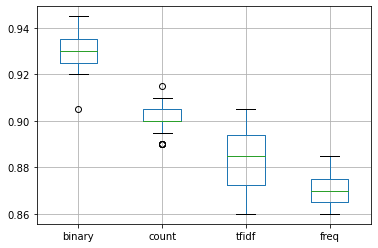

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
# load the vocabulary
vocab_filename = 'vocab.txt'
vocab = load_doc(vocab_filename)
vocab = set(vocab.split())
# load all reviews
train_docs, ytrain = load_clean_dataset(vocab, True)
test_docs, ytest = load_clean_dataset(vocab, False)
# run experiment
modes = ['binary', 'count', 'tfidf', 'freq']
results = pd.DataFrame()
for mode in modes:
    # prepare data for mode
    Xtrain, Xtest = prepare_data(train_docs, test_docs, mode)
    # evaluate model on data for mode
    results[mode] = evaluate_mode(Xtrain, ytrain, Xtest, ytest)
# summarize results
print(results.describe())
# plot results
results.boxplot()
plt.show()

So all of our testing showed that binary mode was the best method of our bag of words model.

# Predicting Sentiment for New Reviews

In [27]:
# classify a review as negative or positive
def predict_sentiment(review, vocab, tokenizer, model):
    # clean/prep new unseen review for model
    tokens = clean_doc(review)
    # filter by vocab
    tokens = [w for w in tokens if w in vocab]
    # convert to line
    line = ' '.join(tokens)
    # encode the data
    encoded = tokenizer.texts_to_matrix([line], mode = 'binary')
    # predict sentiment
    prediction = model.predict(encoded, verbose = 0)
    percent_pos = prediction[0,0]
    if round(percent_pos) == 0:
        return (1-percent_pos), 'NEGATIVE'
    return percent_pos, 'POSITIVE'

In [28]:
# test positive text
text = 'Best movie ever! It was great and I recommend it.'
percent, sentiment = predict_sentiment(text, vocab, tokenizer, model)
print('Review: [%s]\nSentiment: %s (%.3f%%)' % (text, sentiment, percent*100))
# test negative text
text = 'This is a bad movie.'
percent, sentiment = predict_sentiment(text, vocab, tokenizer, model)
print('Review: [%s]\nSentiment: %s (%.3f%%)' % (text, sentiment, percent*100))

Review: [Best movie ever! It was great and I recommend it.]
Sentiment: POSITIVE (99.837%)
Review: [This is a bad movie.]
Sentiment: NEGATIVE (100.000%)


### An under the hood look as to what our predict sentiment function does

In [30]:
review = "This is a bad movie."
tokens = clean_doc(review)
# filter by vocab
tokens = [w for w in tokens if w in vocab]
# convert to line
line = ' '.join(tokens)
# encode the data
encoded = tokenizer.texts_to_matrix([line], mode = 'binary')
# predict sentiment
prediction = model.predict(encoded, verbose = 0)
percent_pos = prediction[0,0]

In [34]:
prediction[0,0]

7.856331e-07